In [ ]:
### LOAD LIBRARIES - install with:
install.packages(c("kohonen", "ggplot2", "sp",
"reshape2"))
library(kohonen)
# library(dummies) # The dummies package is no longer available in CRAN
library(ggplot2)
library(sp)
#library(maptools)
library(reshape2)
#library(rgeos)
library(MASS)
#library(Hmisc)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’




In [ ]:
# Colour palette definition
pretty_palette <- c("#1f77b4", '#ff7f0e', '#2ca02c', '#d62728',
'#9467bd', '#8c564b', '#e377c2')

In [ ]:
# Mount Google Drive
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Find the file
file_info <- drive_find("creditworthiness.csv")

# Download the file to a temporary location
temp_file <- tempfile(fileext = ".csv")
drive_download(as_id(file_info$id), path = temp_file)

# Read the CSV file from the temporary location
data <- read.csv(temp_file)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=f1d97bf680b810340503460a7888223a&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbW9EcUdHdER6NFdlTlVPUTVhOGJYcm9WQ3VsOHZRUzh5Y3JrSVMyY0FOTlFUTWM1NWlCX1BUaUxhMUhhQTJtUSIsInN0YXRlIjoiZjFkOTdiZjY4MGI4MTAzNDA1MDM0NjBhNzg4ODIyM2EifQ==


File downloaded:

• creditworthiness.csv <id: 1o35VDCV81_Xlto9m3zGuI-CbnG8MQgMJ>

Saved locally as:

• /tmp/RtmpL5kqKv/file241d237933.csv



In [ ]:
idcol="functionary"
names(data)[1] <- "functionary"

In [ ]:
classifiedData = subset(data, data[,46] > 0)
unknownData = subset(data, data[,46] == 0)


In [ ]:
# generating correlation comparisions
cor_values <- c()

for (i in 1:45) {
  cor_values <- c(cor_values, abs(cor(classifiedData[46], classifiedData[i])))
}

top_5_indices <- order(cor_values, decreasing = TRUE)[1:5]

for (index in top_5_indices) {
  print(paste("Column:", index, "- Correlation:", cor_values[index]))
}

[1] "Column: 1 - Correlation: 0.317282792275649"
[1] "Column: 3 - Correlation: 0.279887010688829"
[1] "Column: 2 - Correlation: 0.21822313532638"
[1] "Column: 6 - Correlation: 0.217838467351021"
[1] "Column: 4 - Correlation: 0.072232289169423"


In [ ]:
column_name <- colnames(data)[1]
print(column_name)
column_name <- colnames(data)[3]
print(column_name)
column_name <- colnames(data)[2]
print(column_name)
column_name <- colnames(data)[6]
print(column_name)
column_name <- colnames(data)[4]
print(column_name)

[1] "functionary"
[1] "FI3O.credit.score"
[1] "re.balanced..paid.back..a.recently.overdrawn.current.acount"
[1] "credit.refused.in.past."
[1] "gender"


In [ ]:
# From the results shown, I conclude that the five (5) most
# valuable features (constributes heavily to credit rating score) are
# functionary, re-balanced (paid back) a recently overdrawn current
# account, FI30 credit score, credit refused in past and gender. These
# features are chosen from the correlation function by interpreting
# and comparing the correlation values among all attributes in accordance
# to the degree of correlation (cor value closest to -1 or 1).


 ------------------- SOM TRAINING ---------------------------

In [ ]:
# The SOM model is applied on the dataset. The self organising map (SOM)
# is a clustering and data visualisation technique based on a neural
# network viewpoint. The goal of SOM is to find a set of reference
#vectors
# and to assign each object in the data set to that centroid which
#provides
# the best appoximation of that object. There is one neuron associated
#witheach centroid. The data objects are processed one at a time and the
# closest centroid is updated. SOM imposes a topographic ordering on the
# centroids and nearby centroids are also updated. The processing of the
# points continues until a predefined limit is reached or the centroids
# are not changing much. The final output is a set of centroids that
#define clusters.

#choose the variables with which to train the SOM
interestedFeatures <- data[, c(1,2,3,5,6)]
data_train <- classifiedData[, c(1:45)]

In [ ]:
# now train the SOM using the Kohonen method
data_train_matrix <- as.matrix(scale(data_train))
names(data_train_matrix) <- names(data_train)
require(kohonen)
x_dim=20
y_dim=20
small_areas <-FALSE
if (small_areas){
  # larger grid for the small areas example (more samples)
  som_grid <- somgrid(xdim = x_dim, ydim=y_dim, topo="hexagonal")
} else {
  som_grid <- somgrid(xdim = x_dim/2, ydim=y_dim/2, topo="hexagonal")
}

# Train the SOM model!
if (packageVersion("kohonen") < 3){
  system.time(som_model <- som(data_train_matrix,
                             grid=som_grid,
                             rlen=1000,
                             alpha=c(0.9,0.01),
                             n.hood = "circular",
                             keep.data = TRUE ))
}else{
  system.time(som_model <- som(data_train_matrix,
                             grid=som_grid,
                             rlen=1000,
                             alpha=c(0.9,0.01),
                             mode="online",
                             normalizeDataLayers=false,
                             keep.data = TRUE ))
}
summary(som_model)
#rm(som_grid, data_train_matrix)

   user  system elapsed 
 16.761   0.007  16.844 

SOM of size 10x10 with a hexagonal topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 1962 objects.
Mean distance to the closest unit in the map: 31.698.


 -------------------- SOM VISUALISATION -----------------


####CoolBlueHotRed

In [ ]:
#Visualise the SOM model results
# Plot of the training progress - how the node distances have stabilised
#over time.
# custom palette as per kohonen package (not compulsory)
coolBlueHotRed_content <- "
coolBlueHotRed <- function(n, alpha = 1) {
  rainbow(n, end=4/6, alpha=alpha)[n:1]
}
"
# Save the content to a temporary file
temp_file <- tempfile(fileext = ".R")
writeLines(coolBlueHotRed_content, temp_file)

# Load the custom palette
source(temp_file)


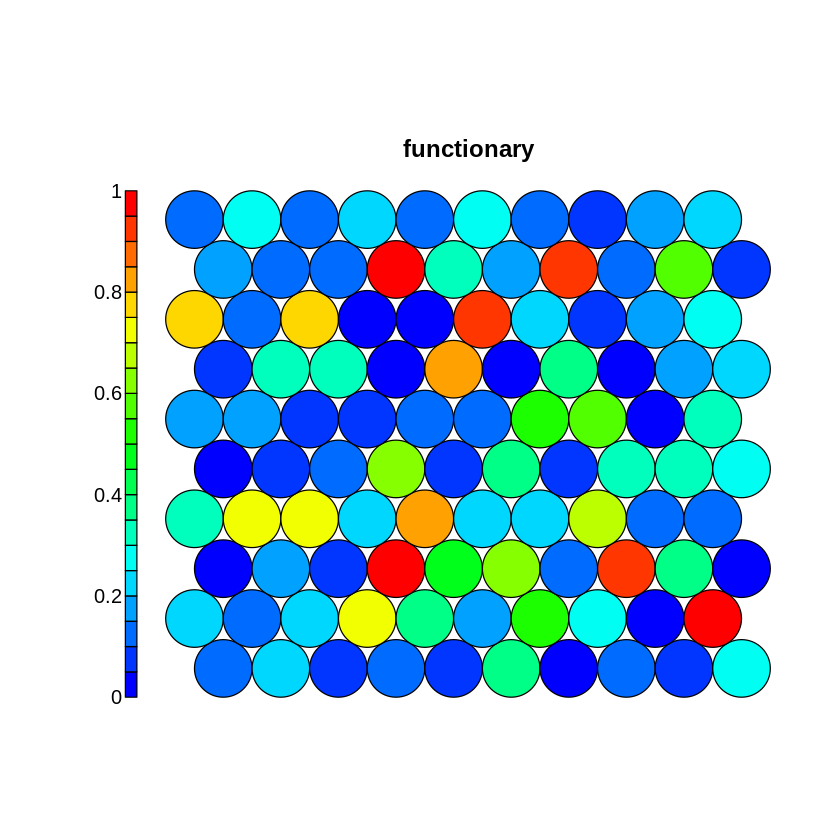

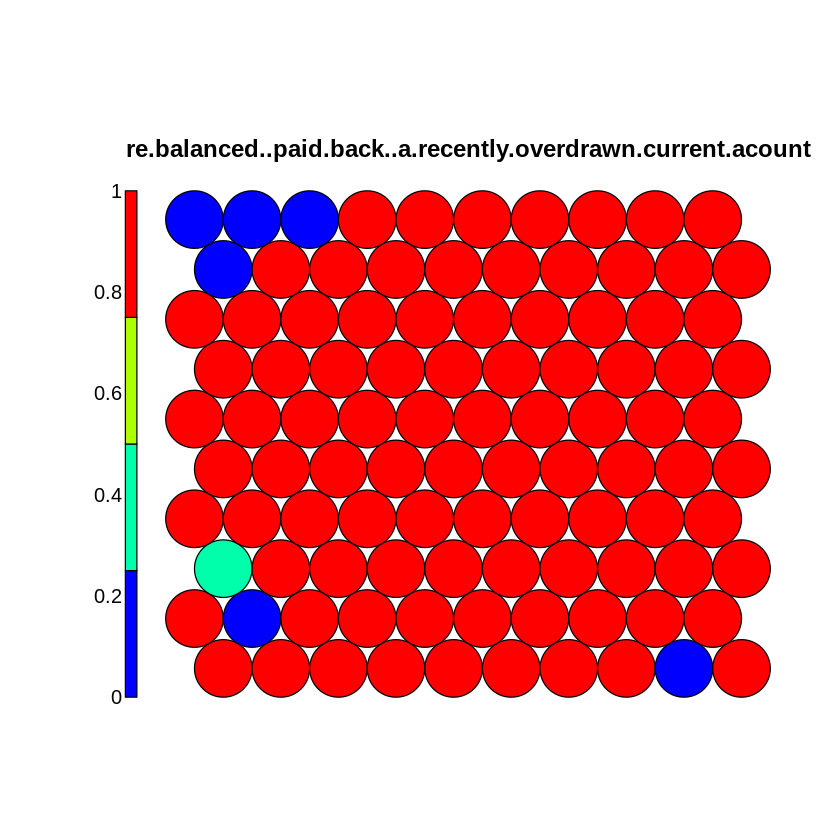

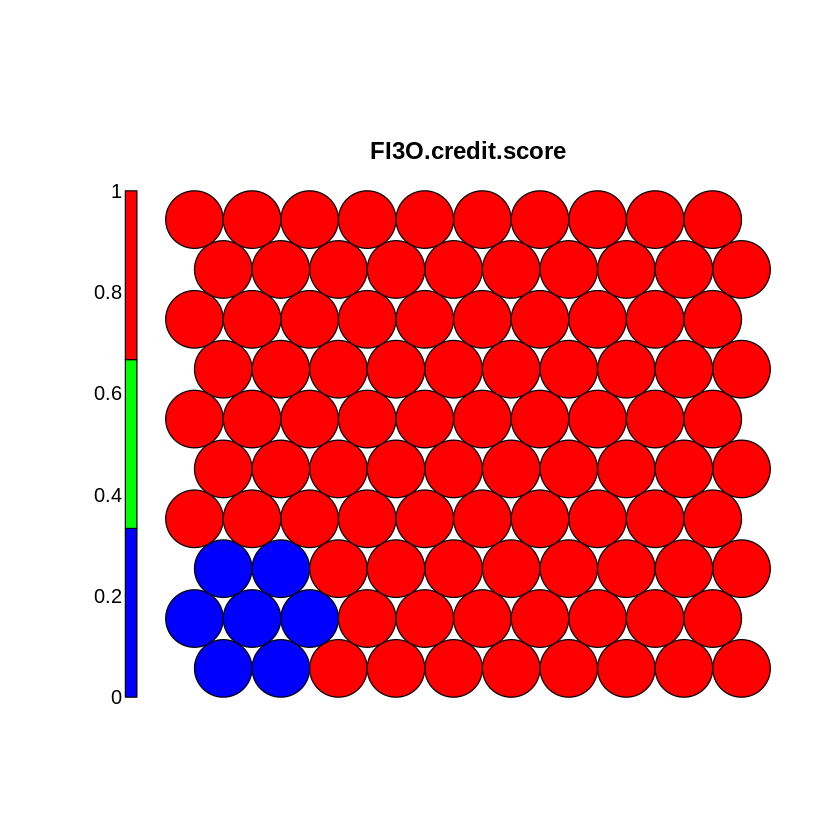

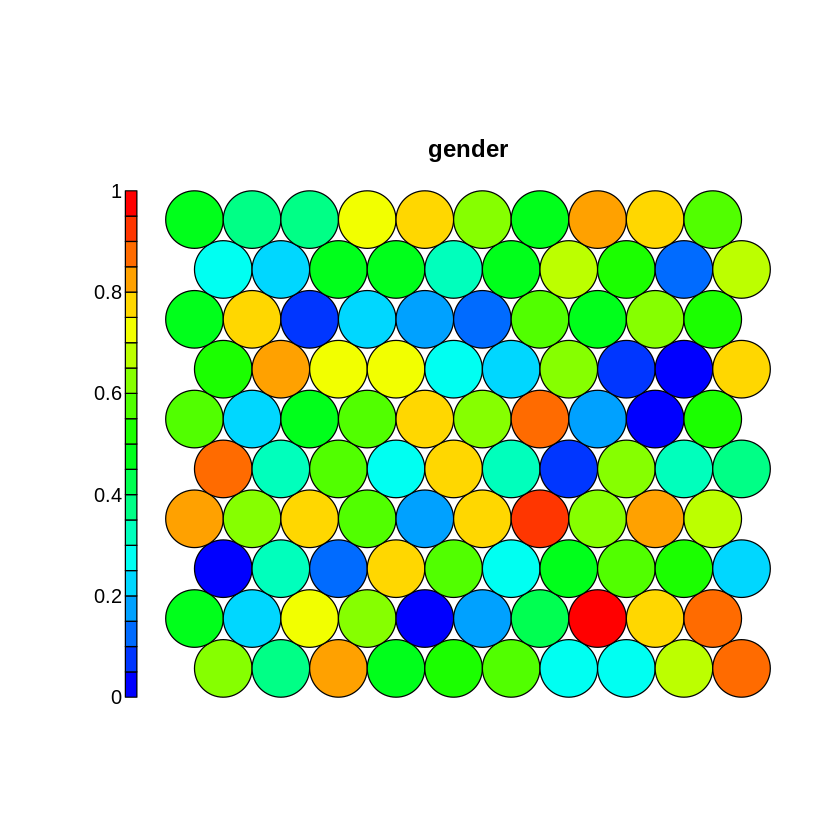

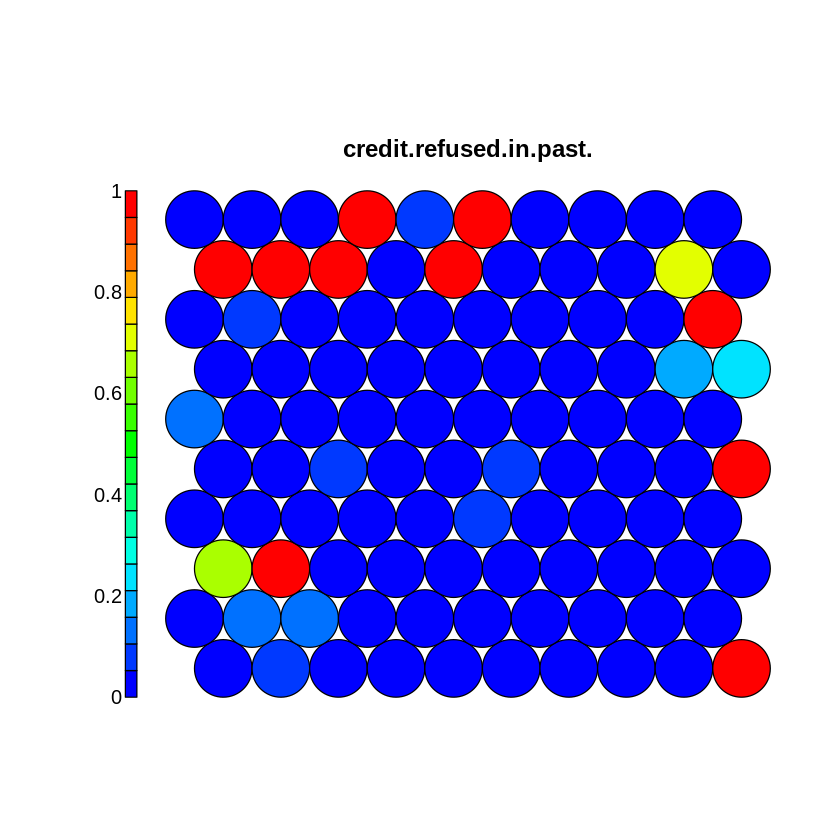

In [ ]:
# Plot the heatmap for a variable at scaled / normalised values
var <- 1 # Functionary
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(som_model, type = "property", property=var_unscaled,
main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

var <- 2 # re-balanced (paid back) a recently overdrawn current acount
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(som_model, type = "property", property=var_unscaled,
main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

var <- 3 # FI3O.credit.score
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(som_model, type = "property", property=var_unscaled,
main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

var <- 4 # gender
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(som_model, type = "property", property=var_unscaled,
main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

var <- 6 #credit refused in past
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(som_model, type = "property", property=var_unscaled,
main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)


Visualise the SOM model results


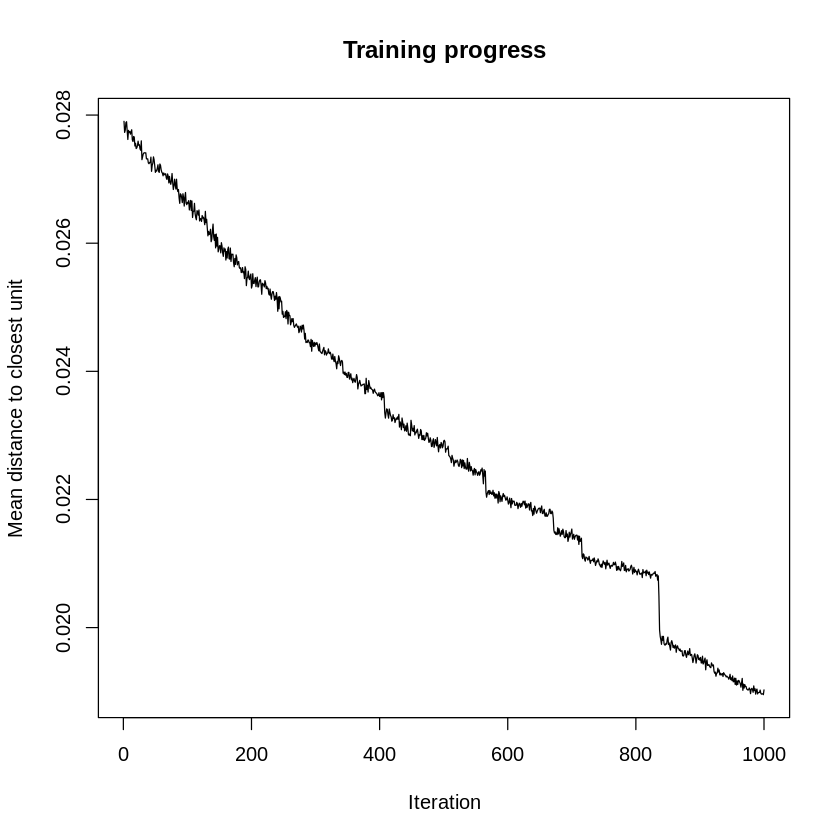

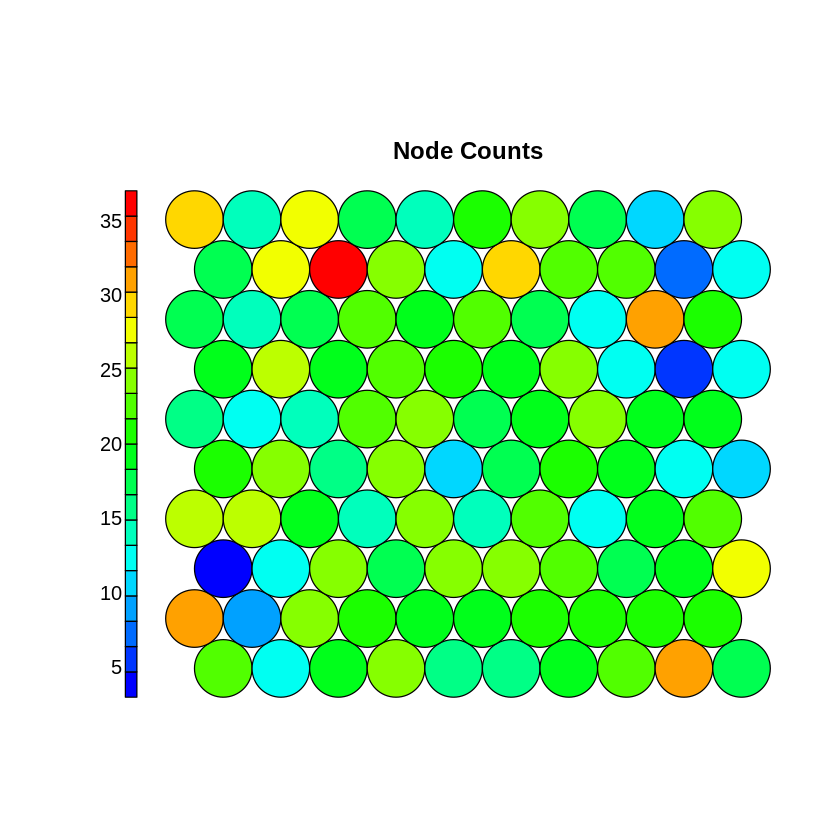

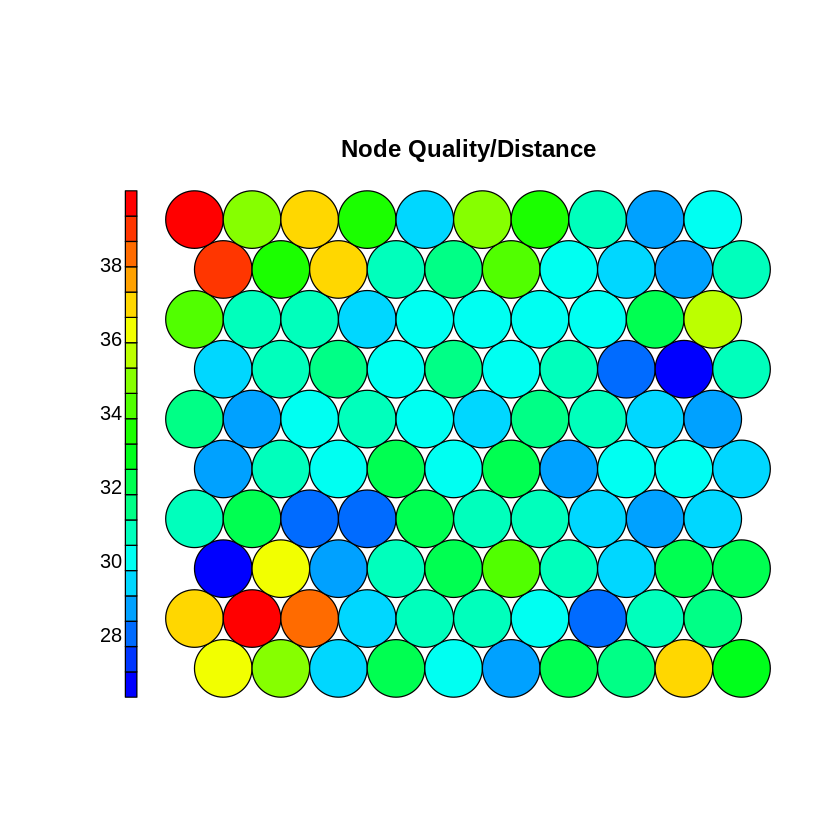

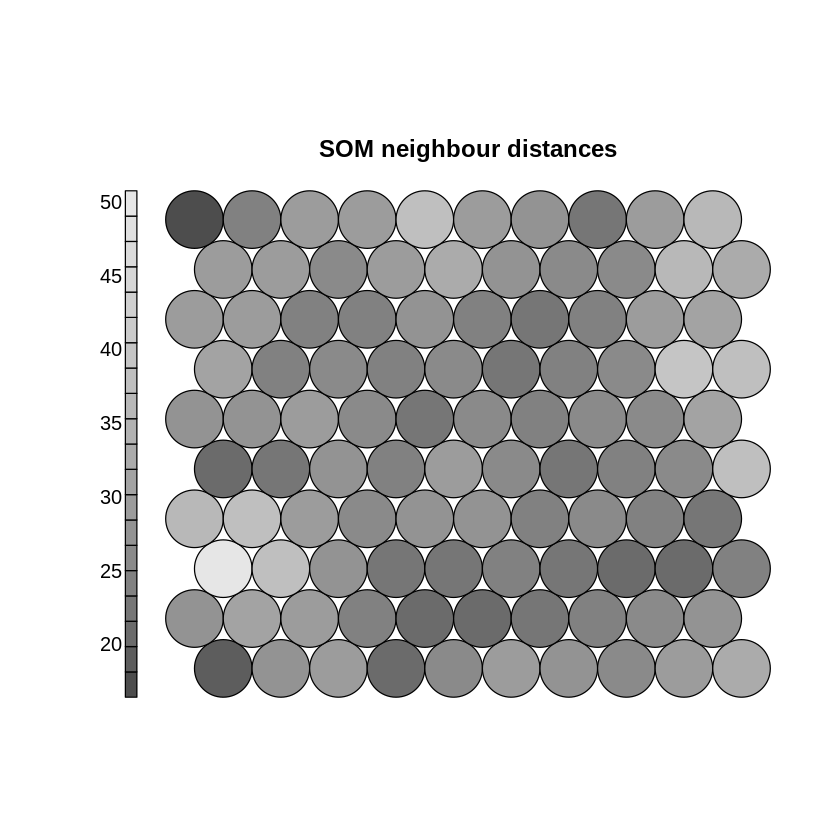

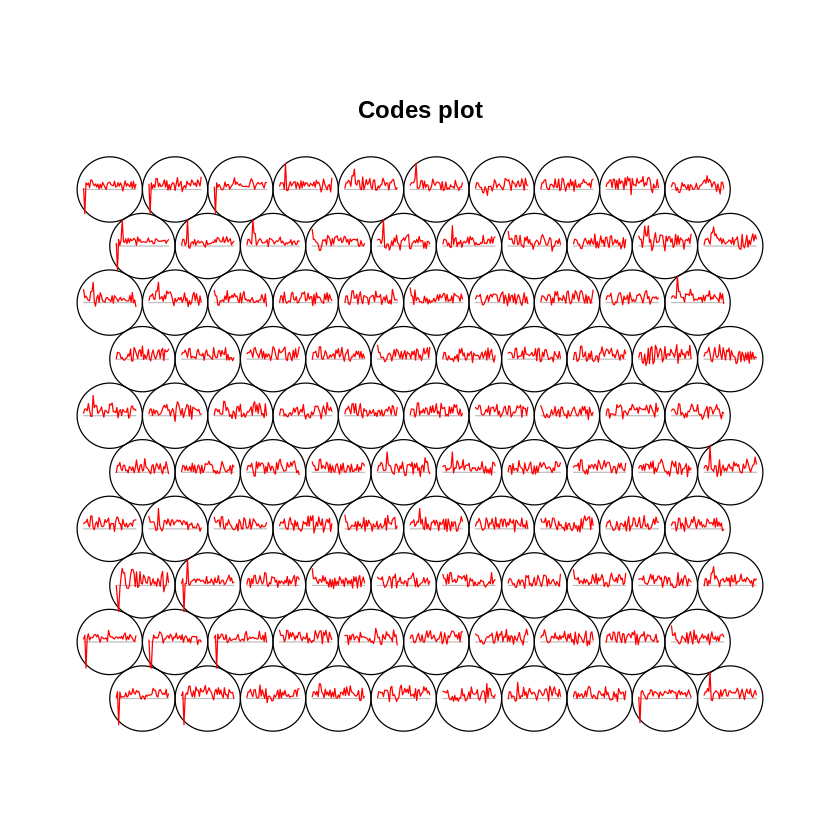

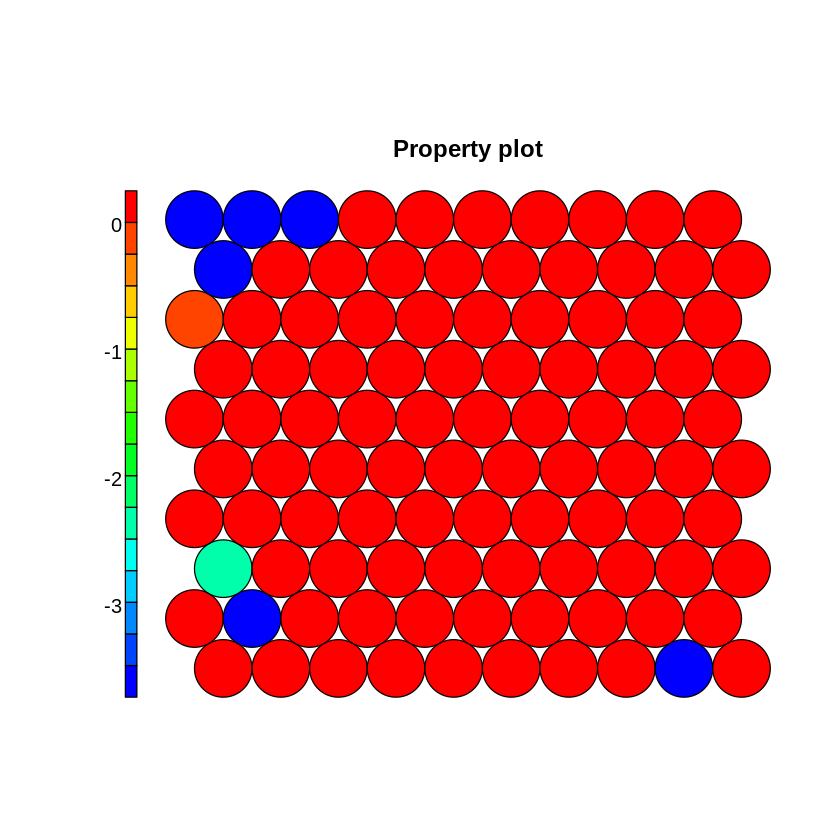

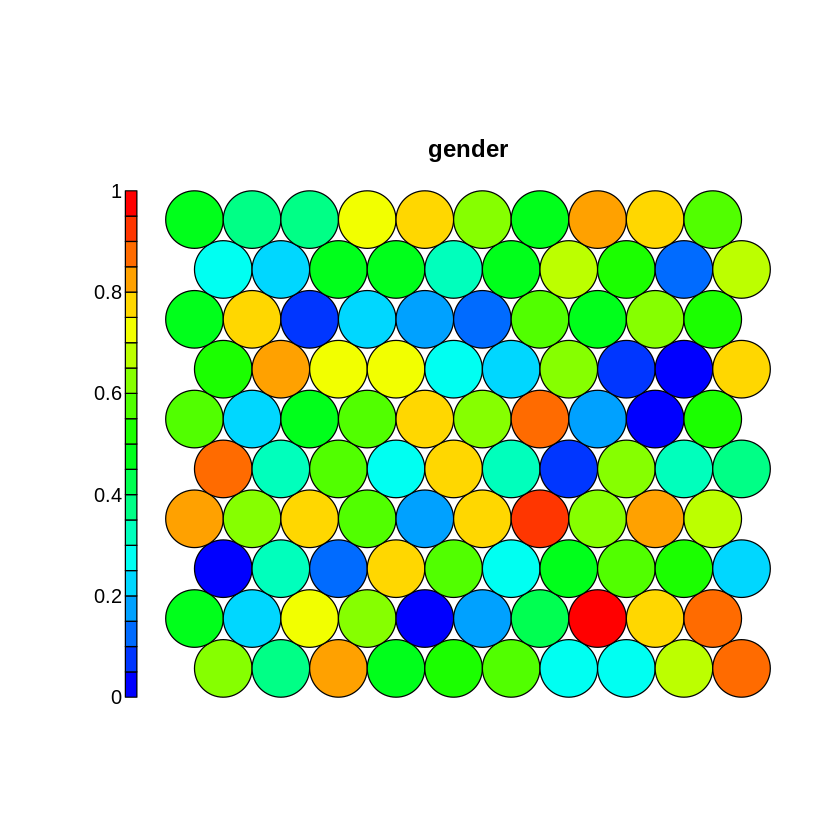

In [ ]:
#Visualise the SOM model results
# Plot of the training progress - how the node distances have stabilised over time.

## custom palette as per kohonen package (not compulsory)
#source(coolBlueHotRed)

plot(som_model, type = "changes")
#counts within nodes
plot(som_model, type = "counts", main="Node Counts", palette.name=coolBlueHotRed)
#map quality
plot(som_model, type = "quality", main="Node Quality/Distance", palette.name=coolBlueHotRed)
#neighbour distances
plot(som_model, type="dist.neighbours", main = "SOM neighbour distances", palette.name=grey.colors)
#code spread
plot(som_model, type = "codes")

# Plot the heatmap for a variable at scaled / normalised values
var <- 2
if (packageVersion("kohonen") < 3){
   plot(som_model, type = "property", property = som_model$codes[,var], main=names(som_model$data)[var], palette.name=coolBlueHotRed)
} else{
   plot(som_model, type = "property", property = som_model$codes[[1]][,var], main=names(som_model$data)[var], palette.name=coolBlueHotRed)
}

# Plot the original scale heatmap for a variable from the training set:
var <- 4 #define the variable to plot
var_unscaled <- aggregate(as.numeric(data_train[,var]), by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(som_model, type = "property", property=var_unscaled, main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)


#plot a variable from the original data set (will be uncapped etc.)
# This function produces a menu for multiple heatmaps.
#plotHeatMap(som_model, classifiedData, variable=0)


             FI3O.credit.score
credit.rating   0   1
            1   1 482
            2  21 949
            3  95 414

             re.balanced..paid.back..a.recently.overdrawn.current.acount
credit.rating   0   1
            1   8 475
            2  38 932
            3  86 423

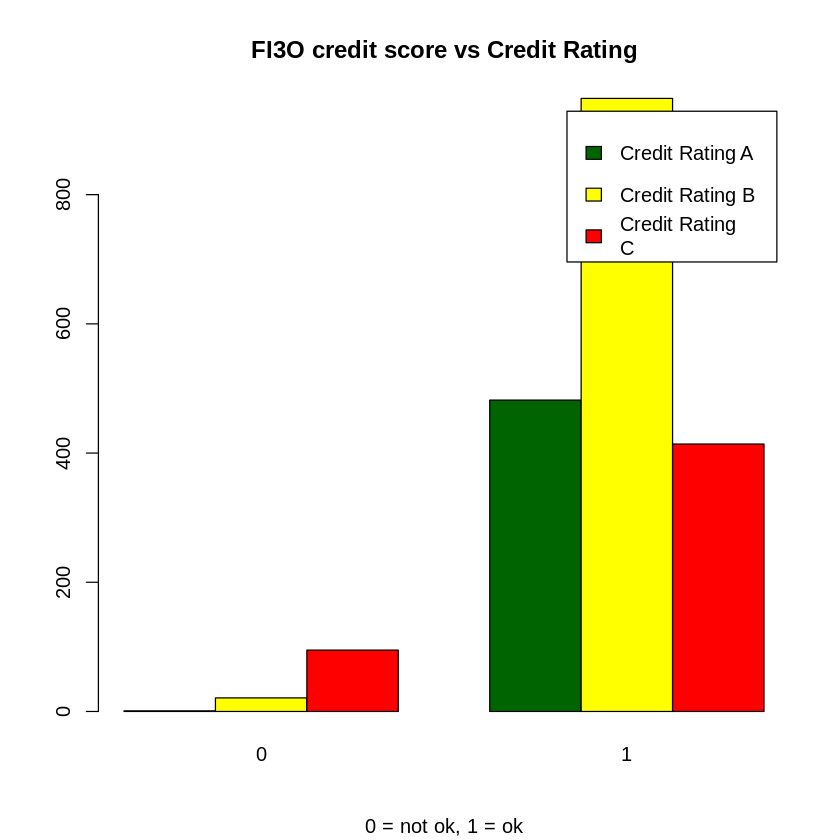

             functionary
credit.rating   0   1
            1 190 293
            2 785 185
            3 410  99

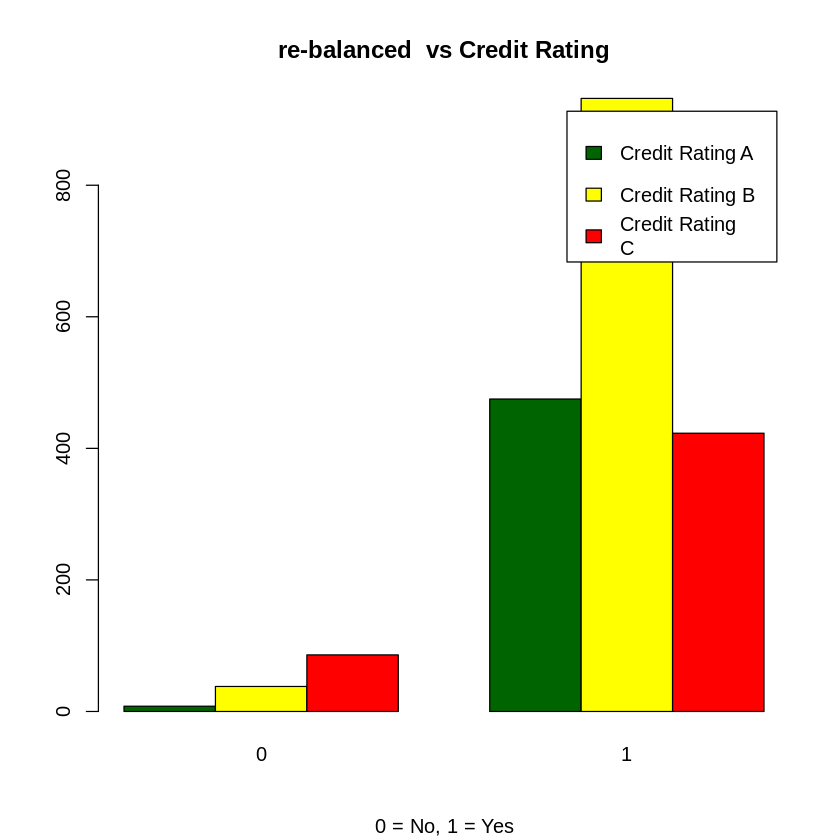

             credit.refused.in.past.
credit.rating   0   1
            1 466  17
            2 878  92
            3 392 117

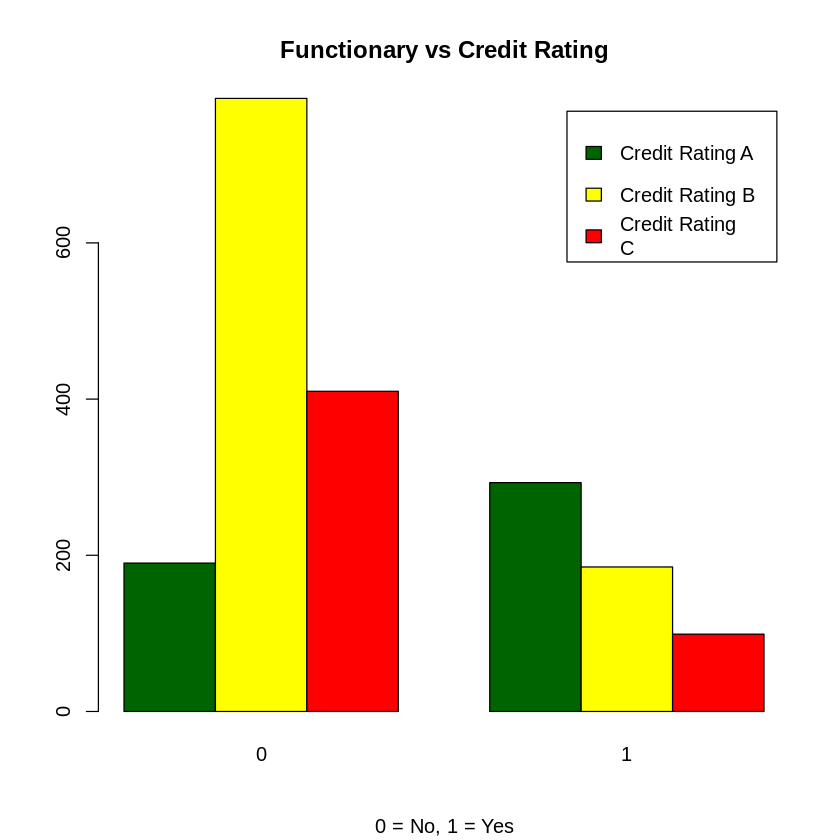

             gender
credit.rating   0   1
            1 210 273
            2 471 499
            3 273 236

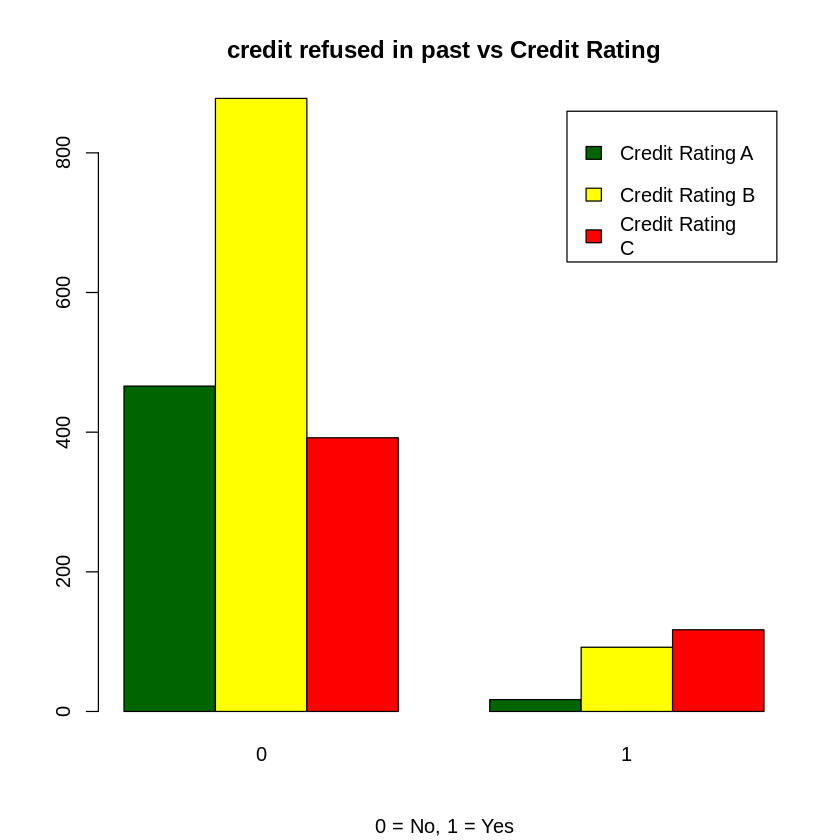

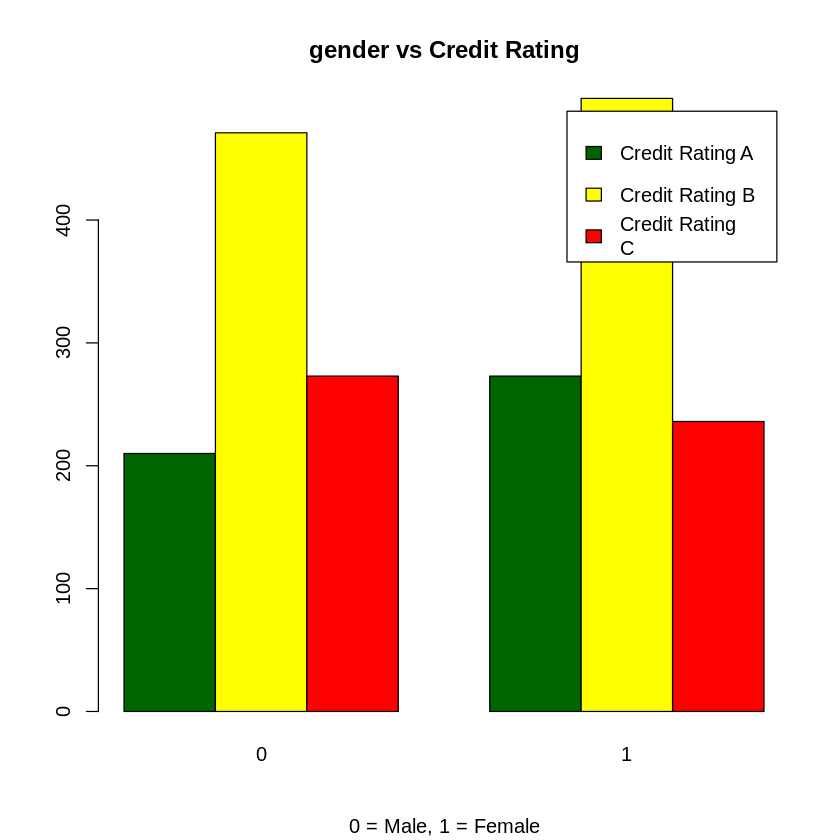

In [ ]:
# Use other visualization tools to supplement the analysis
# to look for additional information

FT = with(classifiedData, table(credit.rating, FI3O.credit.score))
FT
barplot(FT, beside = TRUE,
 legend = c("Credit Rating A", "Credit Rating B", "Credit Rating
C"),
 col = c("darkgreen","yellow", "red"),
 main = "FI3O credit score vs Credit Rating",
 sub="0 = not ok, 1 = ok")

rebalanced = with(classifiedData, table(credit.rating, re.balanced..paid.back..a.recently.overdrawn.current.acount))
rebalanced
barplot(rebalanced, beside = TRUE,
legend = c("Credit Rating A", "Credit Rating B", "Credit Rating
C"),
col = c("darkgreen","yellow", "red"),
main = "re-balanced  vs Credit Rating",
sub="0 = No, 1 = Yes")

functional = with(classifiedData, table(credit.rating, functionary))
functional
barplot(functional, beside = TRUE,
 legend = c("Credit Rating A", "Credit Rating B", "Credit Rating
C"),
 col = c("darkgreen","yellow", "red"),
 main = "Functionary vs Credit Rating",
 sub="0 = No, 1 = Yes")

refused = with(classifiedData, table(credit.rating, credit.refused.in.past.))
refused
barplot(refused, beside = TRUE,
 legend = c("Credit Rating A", "Credit Rating B", "Credit Rating
C"),
 col = c("darkgreen","yellow", "red"),
 main = "credit refused in past vs Credit Rating",
 sub="0 = No, 1 = Yes")

GT = with(classifiedData, table(credit.rating, gender))
GT
barplot(GT, beside = TRUE,
 legend = c("Credit Rating A", "Credit Rating B", "Credit Rating
C"),
 col = c("darkgreen","yellow", "red"),
 main = "gender vs Credit Rating",
 sub="0 = Male, 1 = Female")


 ------------------ Clustering SOM results -------------------


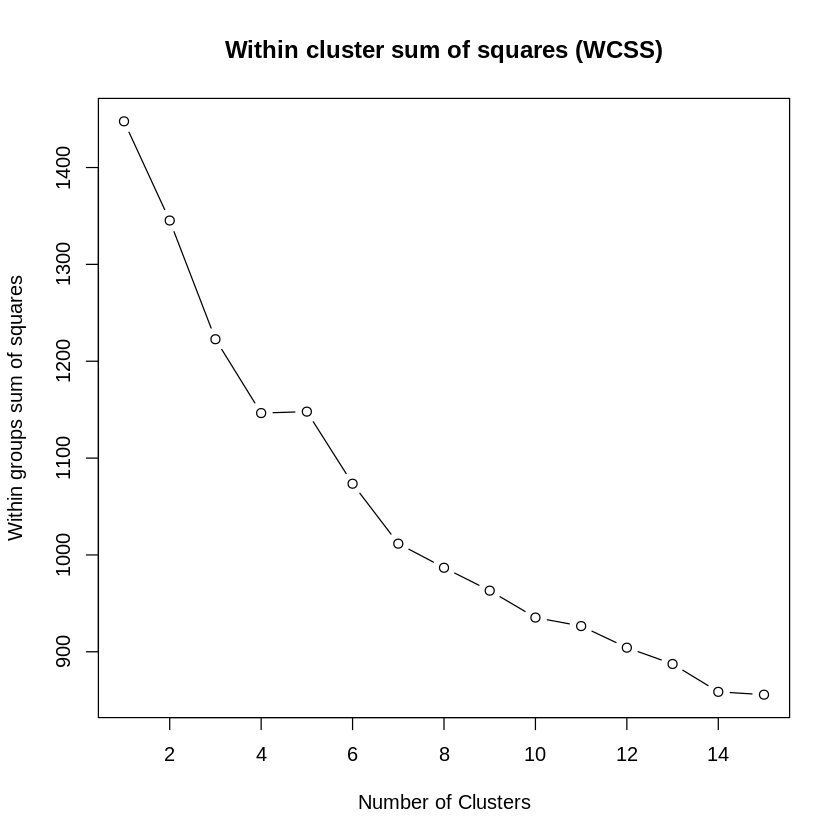

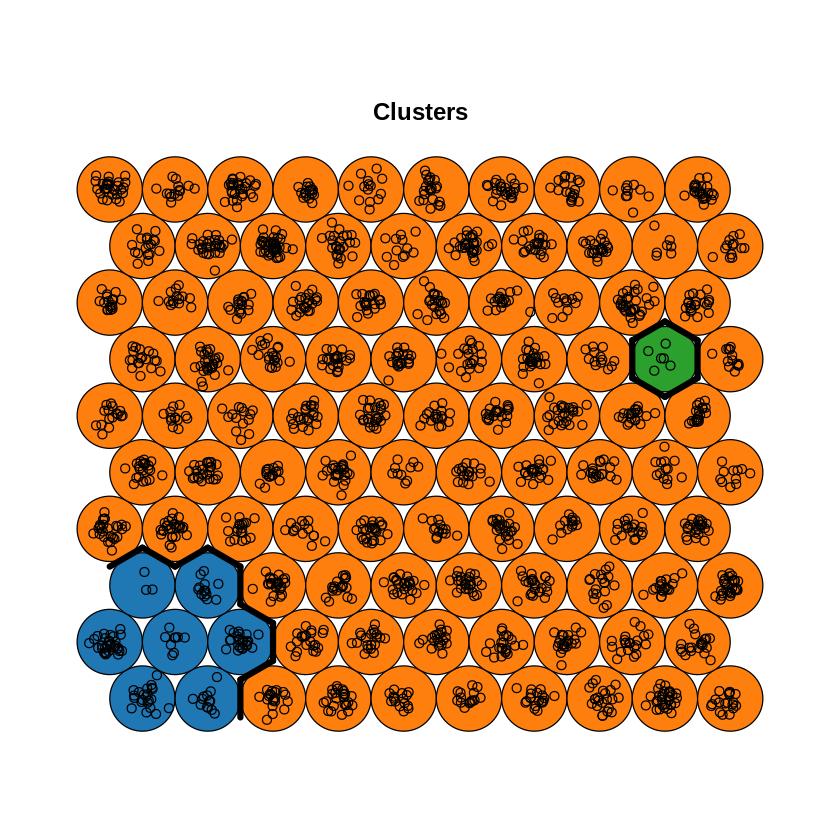

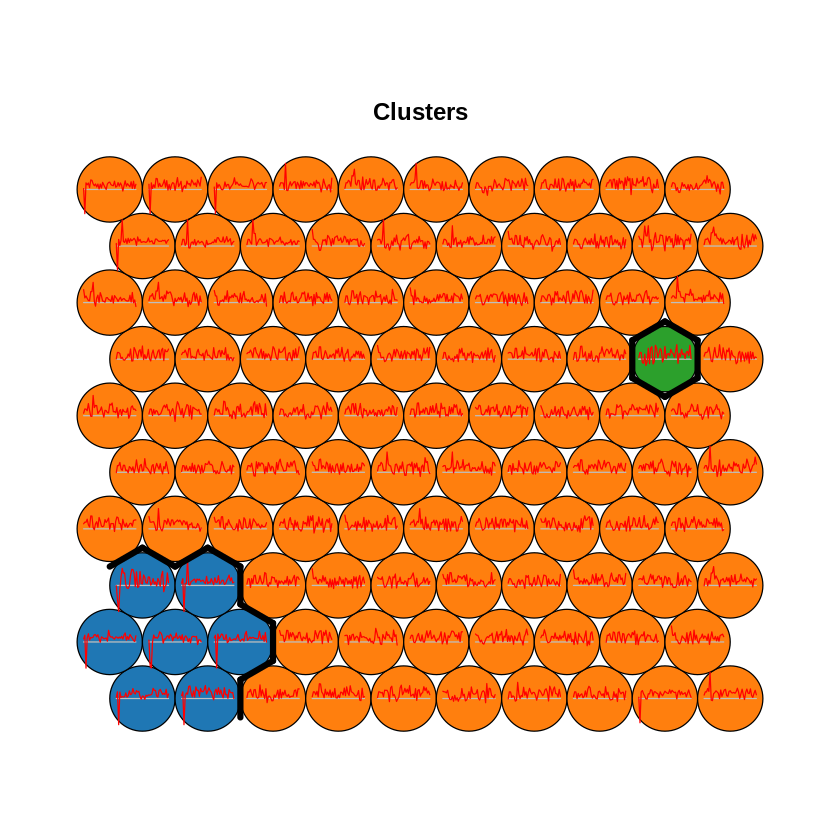

In [ ]:
# show the WCSS metric for kmeans for different clustering sizes.
# Can be used as a "rough" indicator of the ideal number of clusters
mydata <- matrix(unlist(som_model$codes), ncol = length(data_train), byrow = FALSE)

wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
par(mar=c(5.1,4.1,4.1,2.1))
plot(1:15, wss, type="b", xlab="Number of Clusters",
 ylab="Within groups sum of squares", main="Within cluster sum of squares (WCSS)")

# Form clusters on grid
## use hierarchical clustering to cluster the codebook vectors
som_cluster <- cutree(hclust(dist(mydata)), 3)

# Show the map with different colours for every cluster
plot(som_model, type="mapping", bgcol = pretty_palette[som_cluster], main = "Clusters")
add.cluster.boundaries(som_model, som_cluster)

#show the same plot with the codes instead of just colours
plot(som_model, type="codes", bgcol = pretty_palette[som_cluster], main = "Clusters")
add.cluster.boundaries(som_model, som_cluster)

------------------- Classification ---------------------------

In [ ]:
# Load the required library
install.packages("RSNNS")
library(RSNNS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Rcpp


Attaching package: ‘RSNNS’


The following object is masked from ‘package:kohonen’:

    som




In [ ]:
# To train the MLP model to classified based on the following
# interested columns.
interestedColumns = c(1, 2, 3, 4, 6, 9)

In [ ]:
# Seperate value from targets
trainValues = classifiedData[,interestedColumns]
unknownValues = unknownData[,interestedColumns]

In [ ]:
# Use decodeClassLabels() to decode class labels from a
# numerical or levels vector to a binary matrix.
trainTargets = decodeClassLabels(classifiedData[,46])

In [ ]:
# Split the data into training and testing data set
trainSet = splitForTrainingAndTest(trainValues, trainTargets, ratio =
0.2)
# Normalized the training data set
trainSet = normTrainingAndTestSet(trainSet)

In [ ]:
# Train the MLP model
model = mlp(trainSet$inputsTrain,
 trainSet$targetsTrain,
 size=c(20),
 learnFuncParams=c(0.001),
 maxit=500,
 inputsTest = trainSet$inputsTest,
 targetsTest = trainSet$targetsTest)

In [ ]:
# Predict the test
# The predict() function in R is used to predict the values
# based on the input data.
predictTestSet = predict(model, trainSet$inputsTest)

In [ ]:
# Predict the unknown set
predictUnknownSet = predict(model, unknownValues)

In [ ]:
# Compute the confusion matrix
confusionMatrix(trainSet$targetsTrain, fitted.values(model))
cat('\n')
confusionMatrix(trainSet$targetsTest, predictTestSet)

       predictions
targets   1   2   3
      1 221 146  10
      2 128 596  58
      3  48 216 146

       predictions
targets   1   2   3
      1  67  36   3
      2  38 141   9
      3  13  53  33

In [ ]:
# interpreting the unknown data set (prediction)
head(trainTargets)
head(classifiedData[,46])
head(predictUnknownSet)

1,2,3
0,1,0
0,1,0
0,1,0
0,1,0
1,0,0
0,0,1


[1] 2 2 2 2 1 3

1,0.3261184,0.3971083,0.20287962
2,0.2450085,0.6228600,0.13377339
3,0.2751113,0.5466881,0.16177540
4,0.2617379,0.5553988,0.16685970
11,0.4221599,0.6524505,0.07969067
13,0.4803309,0.4757076,0.10534342


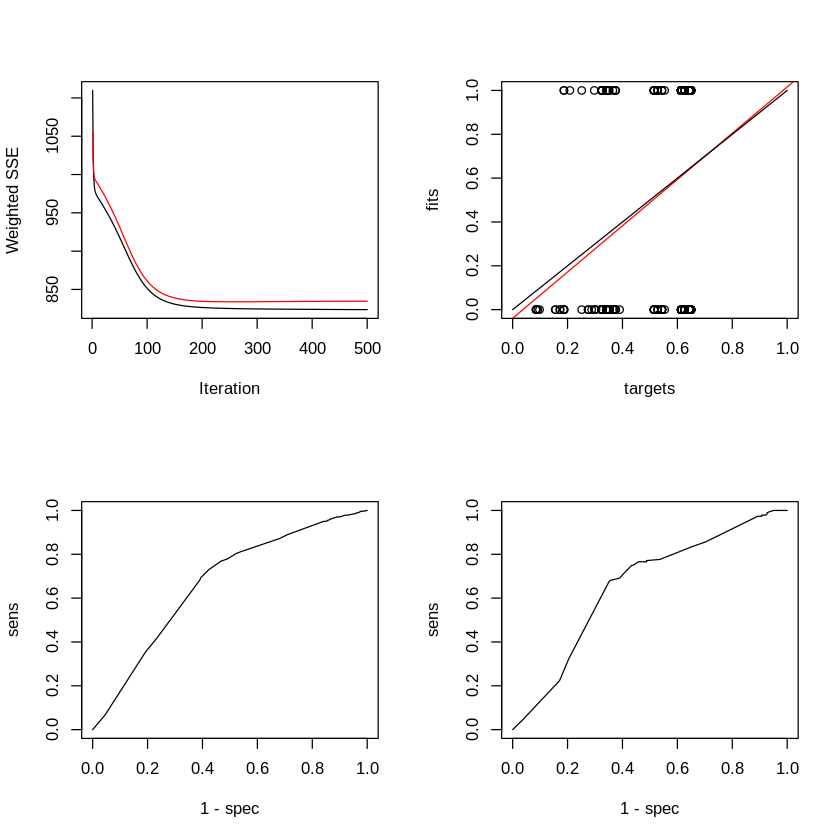

In [ ]:
# Plot
par(mar=c(5.1,4.1,4.1,2.1))
par(mfrow=c(2,2))
plotIterativeError(model)
plotRegressionError(predictTestSet[,2], trainSet$targetsTest[,2])
plotROC(fitted.values(model)[,2], trainSet$targetsTrain[,2])
plotROC(predictTestSet[,2],trainSet$targetsTest[,2])

In [ ]:
#summary(model)
#model
#weightMatrix(model)
#extractNetInfo(model)

In [ ]:
predictions = (67 + 141 + 33)/ (67 + 36  + 3 + 38 + 141 + 9 + 13 + 53 + 33)*100
print ('Accuracy:')
print(predictions)

[1] "Accuracy:"
[1] 61.32316


In [ ]:
for (i in 1:45){
 print(cor(data[46], data[i] ))
}

              functionary
credit.rating  -0.1198832
              re.balanced..paid.back..a.recently.overdrawn.current.acount
credit.rating                                                   0.2642301
              FI3O.credit.score
credit.rating         0.3847463
                  gender
credit.rating 0.02131317
              X0..accounts.at.other.banks
credit.rating                 0.004716928
              credit.refused.in.past.
credit.rating              0.02745321
              years.employed
credit.rating   -0.004292185
              savings.on.other.accounts
credit.rating                 0.3165199
              self.employed.
credit.rating    0.008359808
              max..account.balance.12.months.ago
credit.rating                         0.00328374
              min..account.balance.12.months.ago
credit.rating                         0.04338131
              avrg..account.balance.12.months.ago
credit.rating                          0.04791753
              max..account.balance

Interpretation and Expectations:

**High Prediction Accuracy:**
Achieving 100% prediction accuracy is rare in real-world scenarios.
If the model exhibits near-perfect accuracy on both training and test sets, it could indicate a relatively straightforward problem.

**Challenges and Limitations:**
If the model's performance is suboptimal, there may be inherent complexities in the data.
High-dimensional or noisy data, imbalanced classes, or non-linear relationships can contribute to the difficulty.

**Unknown Data Insights:**
If the model performs well on the unknown dataset, it suggests that the model has learned generalizable patterns.
